In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [87]:
#df.shape
#df.info()

In [9]:
df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [88]:
def check_df(dataframe, head=5):
    print("############## Shape ##############")
    print(dataframe.shape)
    print("\n############## Types ##############")
    print(dataframe.dtypes)
    print("\n############## Head ##############")
    print(dataframe.head(head))
    print("\n############## NA ##############")
    print(dataframe.isnull().sum)

check_df(df)


############## Shape ##############
(891, 15)

############## Types ##############
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

############## Head ##############
   survived  pclass     sex   age  sibsp  parch     fare embarked  class   
0         0       3    male  22.0      1      0   7.2500        S  Third  \
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alon

In [44]:
df = sns.load_dataset("titanic")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [70]:
catg_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object","bool"]]
catg_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [71]:
is_num_but_catg = [col for col in df.columns if df[col].nunique() < 10 and
                   df[col].dtypes in ["int64", "float64"] ]
is_num_but_catg

['survived', 'pclass', 'sibsp', 'parch']

In [72]:
cat_but_card = [col for col in df.columns if df[col].nunique() > 20 and
                   df[col].dtypes in ["category", "object"]]
cat_but_card

[]

In [75]:
catg_cols = catg_cols + is_num_but_catg
catg_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone',
 'survived',
 'pclass',
 'sibsp',
 'parch']

In [81]:
#baya iyi
for col in catg_cols:
    print(f"{col}: {df[col].unique()}")

sex: ['male' 'female']
embarked: ['S' 'C' 'Q' nan]
class: ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
who: ['man' 'woman' 'child']
adult_male: [ True False]
deck: [NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
embark_town: ['Southampton' 'Cherbourg' 'Queenstown' nan]
alive: ['no' 'yes']
alone: [False  True]
survived: [0 1]
pclass: [3 1 2]
sibsp: [1 0 3 4 2 5 8]
parch: [0 1 2 5 3 4 6]


In [86]:
def catg_summary(dataframe, col_name):
    smry = pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                         "ratio" : 100*dataframe[col_name].value_counts() / len(dataframe)
    })
    print(smry)

catg_summary(df, "sex")

        sex      ratio
sex                   
male    577  64.758698
female  314  35.241302


        sex      ratio
sex                   
male    577  64.758698
female  314  35.241302


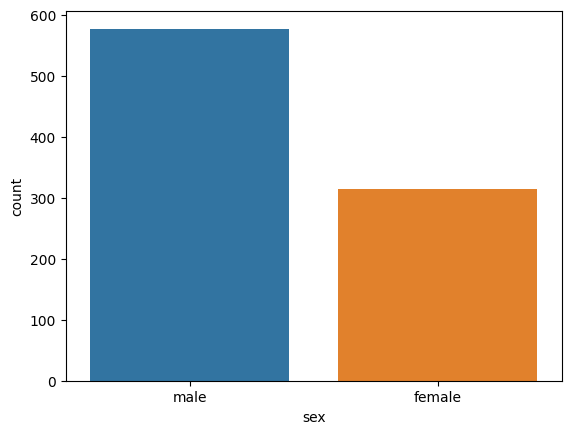

In [91]:
def catg_summary(dataframe, col_name, plot = False):
    smry = pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                         "ratio" : 100*dataframe[col_name].value_counts() / len(dataframe)
    })
    print(smry)

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)



catg_summary(df, "sex", plot=True)

In [100]:
##Numerical Values
numerics = [col for col in df.columns if 
            df[col].dtypes in ["int64", "float64"] and 
            df[col].nunique() > 10]


df[numerics].describe().T

,count,mean,std,min,25%,50%,75%,max
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [113]:
df = sns.load_dataset("titanic")

def grab_col_names(dataframe, cat_thresh=10, car_thresh=30):
    """
    Veri setindeki kategorik, numerik, kategorik ama kardinal değişkenlerin isimlerini verir

    Parameters
    ----------
    dataframe : dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_thresh : int/float, optional
        numerik ama categorik olan değişkenler için eşik değeri, by default 10
    car_thresh : int/float, optional
        categorik ancak cardinal olan değişkenler için eşik değeri, by default 30

    Returns
    ----------
    ...
    """


    catg_cols = [col for col in dataframe if dataframe[col].dtypes in ["object", "catagorical", "bool"]]
    
    num_cols = [col for col in dataframe if dataframe[col].dtypes in ["int64", "float64"]
                 and dataframe[col].nunique() >= cat_thresh]

    num_but_catg = [col for col in dataframe if dataframe[col].dtypes in ["int64", "float64"]
                 and dataframe[col].nunique() < cat_thresh]
    
    catg_but_card = [col for col in dataframe if 
                 dataframe[col].dtypes in ["object", "catagorical", "bool"]
                 and dataframe[col].nunique() > car_thresh]
    
    catg_cols = catg_cols + num_but_catg
    catg_cols = [col for col in catg_cols if col not in cat_but_card]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"catg_cols: {len(catg_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"catg_but_card: {len(catg_but_card)}")
    print(f"num_but_catg: {len(num_but_catg)}")

    return catg_cols, num_cols, catg_but_card
    
catg_cols, num_cols, catg_but_card = grab_col_names(df)
catg_cols, num_cols, catg_but_card


Observations: 891
Variables: 15
catg_cols: 11
num_cols: 2
catg_but_card: 0
num_but_catg: 4


(['sex',
  'embarked',
  'who',
  'adult_male',
  'embark_town',
  'alive',
  'alone',
  'survived',
  'pclass',
  'sibsp',
  'parch'],
 ['age', 'fare'],
 [])

In [114]:
def target_summary_with_cat(dataframe, target , catg_col):
    df = pd.DataFrame({"TARGET_MEAN" : dataframe.groupby(catg_col)[target].mean()})
    print(df)

for col in catg_cols:
    target_summary_with_cat(df, "survived", col)

        TARGET_MEAN
sex                
female     0.742038
male       0.188908
          TARGET_MEAN
embarked             
C            0.553571
Q            0.389610
S            0.336957
       TARGET_MEAN
who               
child     0.590361
man       0.163873
woman     0.756458
            TARGET_MEAN
adult_male             
False          0.717514
True           0.163873
             TARGET_MEAN
embark_town             
Cherbourg       0.553571
Queenstown      0.389610
Southampton     0.336957
       TARGET_MEAN
alive             
no             0.0
yes            1.0
       TARGET_MEAN
alone             
False     0.505650
True      0.303538
          TARGET_MEAN
survived             
0                 0.0
1                 1.0
        TARGET_MEAN
pclass             
1          0.629630
2          0.472826
3          0.242363
       TARGET_MEAN
sibsp             
0         0.345395
1         0.535885
2         0.464286
3         0.250000
4         0.166667
5         0.000000
8 

In [121]:
def target_summary_with_num(dataframe, target , num_col):
    #print(dataframe.groupby(target)[num_col].mean())
    print(dataframe.groupby(target).agg({num_col : "mean"}), end="\n\n")

for col in num_cols:
    target_summary_with_num(df, "survived", col)

                age
survived           
0         30.626179
1         28.343690

               fare
survived           
0         22.117887
1         48.395408



In [127]:
import seaborn as sns

df = sns.load_dataset("titanic")

a = df[["sex", "survived"]].groupby("sex")
print(a)